In [ ]:
"""
A way to draw rectangles and circles
on the same coordinate grid using matplotlib and Shape2DPlotter

plotter.py
A simple 2D Shape Plotter class for beginners.

Goal:
- Plot multiple shapes (Rectangles, Circles) in the same figure.
- Use matplotlib.patches.Rectangle and matplotlib.patches.Circle.
- No NumPy, no advanced math.

Compatible with your Geometry, Rectangle, and Circle classes.


This version explains almost every line of code,
so you can understand exactly what each part does.
"""

import matplotlib.pyplot as plt
from rectangle import Rectangle
from circle import Circle
# Rectangle and Circle patches are special drawing tools inside matplotlib
from matplotlib.patches import Rectangle as MplRectangle, Circle as MplCircle


class Shape2DPlotter:
    """A class that can collect and plot basic 2D shapes."""

    def __init__(self):
        """Start with an empty list to store all the shapes the user adds."""
        self.shapes = []

    def add_shape(self, shape):
        """Add a Rectangle or Circle object to the list."""
        self.shapes.append(shape)

    # --------------------------------------------------
    # RECTANGLE DRAWING
    # --------------------------------------------------
    def _plot_rectangle(self, ax, shape):
        """Draw a rectangle shape on the grid."""
        
        # Create a rectangle patch (matplotlib object)
        # (shape.x, shape.y) → bottom-left corner of the rectangle
        # shape.width, shape.height → size of the rectangle
        rect = MplRectangle(
            (shape.x, shape.y),
            shape.width,
            shape.height,
            edgecolor="blue",      # outline color of the rectangle
            facecolor="lightgreen",# fill color inside the rectangle
            alpha=0.5              # transparency (0.0 = invisible, 1.0 = solid)
        )

        # Add this rectangle to the grid (ax = "axes", the drawing area)
        ax.add_patch(rect)

        # Add a text label in the center of the rectangle
        # (shape.x + shape.width / 2) → halfway point along width (center X)
        # (shape.y + shape.height / 2) → halfway point along height (center Y)
        ax.text(
            shape.x + shape.width / 2,
            shape.y + shape.height / 2,
            f"Rect\nA={shape.area:.1f}",  # label shows "Rect" and area value
            ha="center",                  # center text horizontally
            va="center",                  # center text vertically
            fontsize=9,                   # text size
        )

    # --------------------------------------------------
    # CIRCLE DRAWING
    # --------------------------------------------------
    def _plot_circle(self, ax, shape):
        """Draw a circle shape on the grid."""
        
        # Create a circle patch
        # (shape.x, shape.y) → center of the circle
        # shape.radius → radius size of the circle
        circ = MplCircle(
            (shape.x, shape.y),
            shape.radius,
            edgecolor="purple",     # outline color
            facecolor="violet",     # fill color
            alpha=0.5               # transparency again (0.5 = see-through)
        )

        # Add this circle to the grid (the axes)
        ax.add_patch(circ)

        # Add text at the center of the circle
        ax.text(
            shape.x,                # center X position
            shape.y,                # center Y position
            f"Circle\nA={shape.area:.1f}",  # show shape type + area
            ha="center",
            va="center",
            fontsize=9,
        )

    # --------------------------------------------------
    # MAIN PLOT METHOD
    # --------------------------------------------------
    def plot_all(self):
        """Draw all added shapes on one grid."""
        
        if not self.shapes:
            print("No shapes to plot yet!")
            return

        # Create a figure (the window) and axes (the drawing grid)
        fig, ax = plt.subplots()

        # Go through each shape in the list
        for shape in self.shapes:
            # If it has width and height → it's a rectangle
            if hasattr(shape, "width") and hasattr(shape, "height"):
                self._plot_rectangle(ax, shape)

            # If it has radius → it's a circle
            elif hasattr(shape, "radius"):
                self._plot_circle(ax, shape)

            # If neither, skip it
            else:
                print(f"Skipping unknown shape type: {type(shape).__name__}")

        # -------------------------------
        # Grid Settings and Display
        # -------------------------------

        # Keep the same scale on both axes (so circles don't look oval)
        ax.set_aspect("equal")

        # Label axes to show directions
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")

        # Add a title at the top of the plot window
        ax.set_title("2D Shape Plotter")

        # Show a grid background to make coordinates easier to see
        ax.grid(True)

        # Automatically adjust the grid limits to include all shapes
        ax.autoscale()

        # Finally, display the plot window
        plt.show()


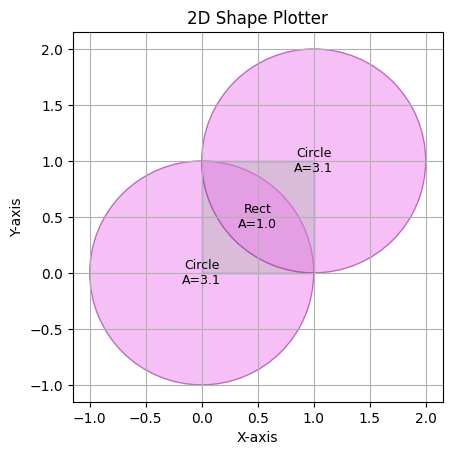

In [21]:

r1 = Rectangle(0, 0, 1, 1)
c1 = Circle(x = 0, y = 0, radius = 1)
c2 = Circle(x=1, y=1, radius=1)


# create plotter
plotter = Shape2DPlotter()

# plot shapes
plotter.add_shape
plotter.add_shape(r1)
plotter.add_shape(c1)
plotter.add_shape(c2)
plotter.plot_all()